In [5]:

import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):

        centroids = X[:self.n_clusters] #intializing first n_clusters as centroid from dataset
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))   
        for c in range(self.n_clusters):
             distance[:, c] = np.sqrt(np.square(X - centroids[c, :]).sum(axis=1))             
        return distance

    def find_closest_cluster(self, distance):
        #on x-axis 
        return np.argmin(distance, axis=1)

    def compute_centroids(self, X, labels):
        
        
        new_centroids = np.zeros((self.n_clusters, X.shape[1])) 
        
        for c in range(self.n_clusters):            
            current_cluster = X[labels == c, :]
            new_centroids[c, :] = current_cluster.mean(axis=0) #mean of all numbers labelleds as 0 , at 0 index similarly mean of all numbers labelled as 1 
        return new_centroids
  
    
    def fit(self, X):
        self.centroids  = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
    def centroid_and_cluster_ids(self):
        return self.centroids,km.labels

[[ 0.48880088  0.55678942]
 [-0.73320131 -0.83518413]]
(array([[ 0.48880088,  0.55678942],
       [-0.73320131, -0.83518413]]), array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]))


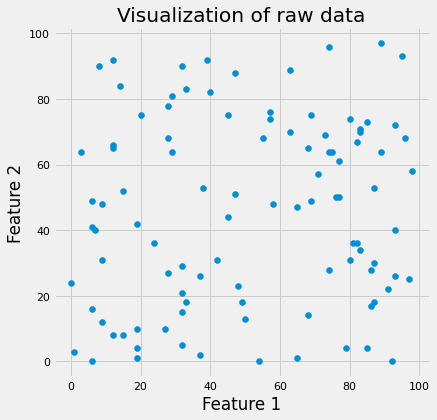

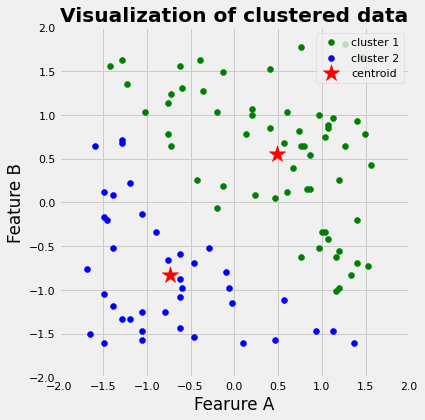

In [7]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.DataFrame(np.random.randint(0,100,size=(100, 2)), columns=list('AB'))

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of raw data');


X_std = StandardScaler().fit_transform(df)

# Run l
km = Kmeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.centroids
print(centroids)
print(km.centroid_and_cluster_ids())

# Plot the clustered data
fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(X_std[km.labels == 0, 0], X_std[km.labels == 0, 1],
            c='green', label='cluster 1')
plt.scatter(X_std[km.labels == 1, 0], X_std[km.labels == 1, 1],
            c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Fearure A')
plt.ylabel('Feature B')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');